In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style("whitegrid")
# sns.set()

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
%%time
df = pd.read_excel('UFOVMAMMO_RSI_2021/UFOVMAMMO_RSI_2021/UFOVmammoData3.xlsx')

Wall time: 22.8 s


In [5]:
df.head()

,participant,stimulus,LineNumber,Case,CaseNum,trial,SacNumber,RevSac,casevsnormal,target present,accuracy,TrialType,fixX,fixY,SacSizePixel,SacSize(deg),SacBin,duration,durBin,CumDur,CumDurBIn,DistTarg,DtargBin,DistTarg<1.5,PreTargPost,FirstTonTrial,FirstTinSeries,OnesFromTFix,CountFromTFix,FinalFixFlag,targX,targY,fixTX,fixTY,OLDtargX,OLDtargY
0,0,01_n385_N.jpg,1,n385_N.jpg,385,1,1,41,n,0,0,FA,1117.800,556.500,,,,80.100,100,80.100,0,-99.000,-99,,FIRST,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
1,0,01_n385_N.jpg,2,n385_N.jpg,385,1,2,40,n,0,0,FA,1205.300,614.900,105.199,2.203,2,883.900,900,964.000,1,-99.000,-99,,PRE,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,0,01_n385_N.jpg,3,n385_N.jpg,385,1,3,39,n,0,0,FA,1140.700,502.900,129.295,2.707,3,180.100,200,1144.100,1,-99.000,-99,,PRE,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
3,0,01_n385_N.jpg,4,n385_N.jpg,385,1,4,38,n,0,0,FA,1066.200,339.000,180.037,3.770,4,343.900,350,1488.000,1,-99.000,-99,,PRE,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
4,0,01_n385_N.jpg,5,n385_N.jpg,385,1,5,37,n,0,0,FA,1242.100,704.600,405.714,8.495,8,784.100,800,2272.100,2,-99.000,-99,,PRE,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000


### Distribution of fixation durations

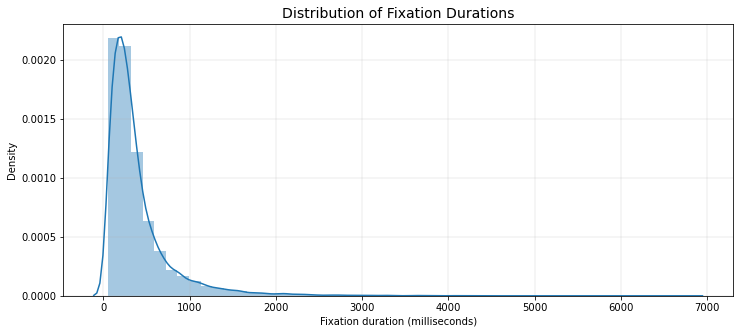

In [6]:
duration_dist = plt.figure(figsize=(12,5))
ax = sns.distplot(df['duration'])
ax.set(xlabel='Fixation duration (milliseconds)')
plt.title('Distribution of Fixation Durations', fontsize=14)
plt.grid(linestyle='-', linewidth=0.25)
plt.show()

In [7]:
print(df['duration'].max())
print(df['duration'].min())

6783.4
51.7


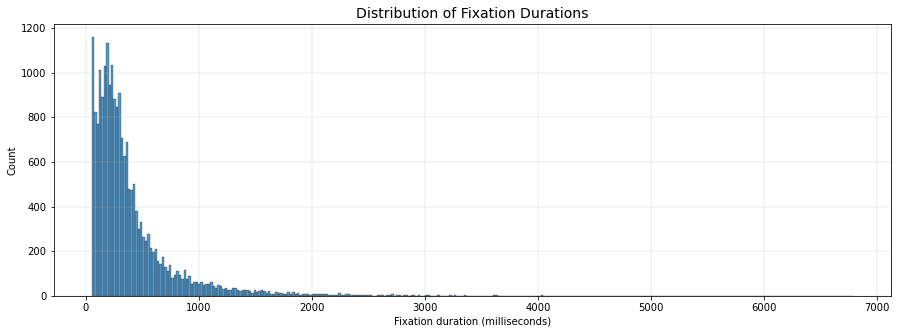

In [8]:
duration_dist = plt.figure(figsize=(15,5))
ax = sns.histplot(df['duration'])
ax.set(xlabel='Fixation duration (milliseconds)')
plt.title('Distribution of Fixation Durations', fontsize=14)
plt.grid(linestyle='-', linewidth=0.25)

### Fixation duration before target

In [26]:
df2 = df.copy()
df2['PreTargPost'] = df2['PreTargPost'].str.replace('PRE', 'SEARCH')
df2.iloc[:3]

,participant,stimulus,LineNumber,Case,CaseNum,trial,SacNumber,RevSac,casevsnormal,target present,accuracy,TrialType,fixX,fixY,SacSizePixel,SacSize(deg),SacBin,duration,durBin,CumDur,CumDurBIn,DistTarg,DtargBin,DistTarg<1.5,PreTargPost,FirstTonTrial,FirstTinSeries,OnesFromTFix,CountFromTFix,FinalFixFlag,targX,targY,fixTX,fixTY,OLDtargX,OLDtargY
0,0,01_n385_N.jpg,1,n385_N.jpg,385,1,1,41,n,0,0,FA,1117.800,556.500,,,,80.100,100,80.100,0,-99.000,-99,,FIRST,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
1,0,01_n385_N.jpg,2,n385_N.jpg,385,1,2,40,n,0,0,FA,1205.300,614.900,105.199,2.203,2,883.900,900,964.000,1,-99.000,-99,,SEARCH,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,0,01_n385_N.jpg,3,n385_N.jpg,385,1,3,39,n,0,0,FA,1140.700,502.900,129.295,2.707,3,180.100,200,1144.100,1,-99.000,-99,,SEARCH,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000


In [23]:
df2 = df.copy()
df2['PreTargPost'] = df2['PreTargPost'].str.replace('PRE', 'SEARCH')
for i in df2['PreTargPost']:
    if df2['PreTargPost'][i] == 'TARG' and df2['PreTargPost'][i-1] != 'FIRST':
        df2['PreTargPost'][i-1] == 'PRETARG'
# df2 = df2[df2['trial'].values == 1]
# df2 = df2[df2['participant'].values == 0]
df2.tail()

KeyError: 'FIRST'

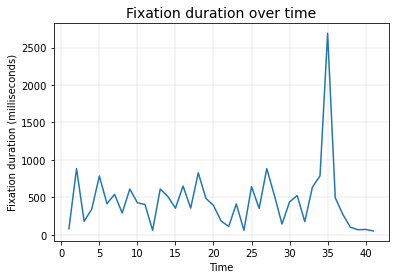

In [22]:
ax = sns.lineplot(x=df2['SacNumber'], y=df2['duration'])
ax.set(xlabel='Time')
ax.set(ylabel='Fixation duration (milliseconds)')
not_red_df = df2.loc[df['val'] != 'red']
red_df = df.loc[df['val'] == 'red']
plt.title('Fixation duration over time', fontsize=14)
plt.grid(linestyle='-', linewidth=0.25)